In [36]:
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [37]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [38]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [39]:
target = 'NU_NOTA_MT'

In [40]:
train[target].isna().sum()

3597

In [41]:
train.dropna(how='all', subset=[target], inplace=True)

In [42]:
features = ['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

In [43]:
cat_features = [i for i in features if i[:2] in ['SG', 'CO', 'TP']]
num_features = list( set(features) - set(cat_features) )
num_features

['IN_GESTANTE',
 'NU_IDADE',
 'NU_NOTA_REDACAO',
 'IN_SABATISTA',
 'IN_CEGUEIRA',
 'NU_NOTA_LC',
 'NU_NOTA_COMP5',
 'IN_TREINEIRO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP4',
 'IN_BAIXA_VISAO',
 'NU_NOTA_CN',
 'IN_DISLEXIA',
 'NU_NOTA_CH',
 'IN_IDOSO',
 'NU_NOTA_COMP2',
 'IN_SURDEZ',
 'NU_NOTA_COMP3',
 'IN_DISCALCULIA']

In [44]:
train[cat_features] = train[cat_features].fillna(-1).astype(str)
train[num_features] = train[num_features].fillna(-1)
train = train.reset_index(drop=True)

In [45]:
dum_dfcat = pd.get_dummies(train[cat_features], columns=cat_features)
df_train = pd.concat([train[num_features], dum_dfcat], axis=1, ignore_index=True)

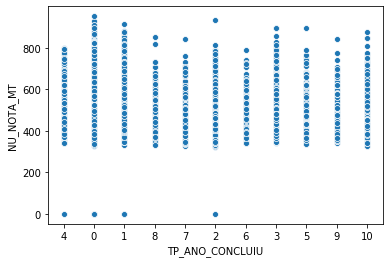

In [46]:
sns.scatterplot(train['TP_ANO_CONCLUIU'], train['NU_NOTA_MT'])

In [47]:
y_train = train['NU_NOTA_MT']
x_train = df_train

In [48]:
clf = DecisionTreeRegressor(max_depth=12, min_samples_leaf=5)
clf.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=5)

In [49]:
# Valor de R2 perto de 1 nos diz que é um bom modelo
print(f"R2 score: {r2_score(y_train, y_pred_train)}")
# MSE Score perto de 0 é um bom modelo
print(f"MSE score: {mean_squared_error(y_train, y_pred_train)}")
df_train.shape

R2 score: 0.6459992067743843
MSE score: 3527.3741332684076


(10133, 168)

In [50]:
test[cat_features] = test[cat_features].fillna(-1).astype(str)
test[num_features] = test[num_features].fillna(-1)
dum_dfcatteste = pd.get_dummies(test[cat_features], columns=cat_features)
df_test = pd.concat([test[num_features], dum_dfcatteste], axis=1, ignore_index=True)
predicted = clf.predict(df_test)
df_new = test[ ['NU_INSCRICAO']].copy()
df_new['NU_NOTA_MT'] = predicted
df_new.to_csv('answer.csv', index=False)
